# 中国家庭追踪调查2018


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.

In [2]:
df = pd.read_stata('/Users/datalab/bigdata/中国家庭追踪调查2018/cfps2018person_202012.dta', 
                    convert_categoricals=False, convert_missing=False)

In [4]:
df.head()

,pid,code,fid18,fid16,fid14,fid12,fid10,pid_a_f,pid_a_m,selfrpt,...,cfps2018eduy_im,gdge,gdgeyear,gdgemonth,catipilot,pg02,pg1201_min,pg1201_max,interviewerid18,releaseversion
0,100051501.0,501.0,100051.0,100051.0,100051.0,-8.0,-8.0,110043201.0,110043105.0,1.0,...,12.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,761040.0,2.1
1,100051502.0,502.0,100051.0,100051.0,100051.0,-8.0,-8.0,-8.0,-8.0,1.0,...,12.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,761040.0,2.1
2,100160601.0,601.0,100160.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,459505.0,2.1
3,100376551.0,551.0,100376.0,100376.0,-8.0,-8.0,-8.0,-8.0,-8.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,526621.0,2.1
4,100551551.0,551.0,100551.0,100551.0,-8.0,-8.0,-8.0,-8.0,-8.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,696822.0,2.1


In [5]:
len(df)

37354

In [6]:
print(sorted(df.columns.tolist()))

['a12hk', 'a12p', 'age', 'birthp', 'birthw', 'catipilot', 'cesd20sc', 'cesd8', 'cfps2018edu', 'cfps2018eduy', 'cfps2018eduy_im', 'cfps2018sch', 'cid18', 'cmonth', 'cmstart', 'code', 'cohabitn', 'countyid18', 'cyear', 'ear1', 'ear101', 'ear101a', 'ear101c_code', 'ear101e_code', 'ear102', 'ear103', 'ear104c', 'ear104m', 'ear104y', 'ear105m', 'ear105y', 'ear106_1fc_a_1', 'ear106_1fc_a_2', 'ear106_1fc_a_3', 'ear106_1fc_a_4', 'ear106_1fc_a_5', 'ear106_1fc_a_6', 'ear106_1fc_a_7', 'ear106_1fc_a_8', 'ear106_1fm_a_1', 'ear106_1fm_a_2', 'ear106_1fm_a_3', 'ear106_1fm_a_4', 'ear106_1fm_a_5', 'ear106_1fm_a_6', 'ear106_1fm_a_7', 'ear106_1fm_a_8', 'ear106_1fy_a_1', 'ear106_1fy_a_2', 'ear106_1fy_a_3', 'ear106_1fy_a_4', 'ear106_1fy_a_5', 'ear106_1fy_a_6', 'ear106_1fy_a_7', 'ear106_1fy_a_8', 'ear106_1sm_a_1', 'ear106_1sm_a_2', 'ear106_1sm_a_3', 'ear106_1sm_a_4', 'ear106_1sm_a_5', 'ear106_1sm_a_6', 'ear106_1sm_a_7', 'ear106_1sm_a_8', 'ear106_1sy_a_1', 'ear106_1sy_a_2', 'ear106_1sy_a_3', 'ear106_1sy_a_4',

## 幸福感

In [7]:
# 你有多幸福？
# QM2016"有多幸福(分)"若 0 分代表最低，10 分代表最高，“【CAPI】加载您/你”觉 得自己有多幸福? 0..10
df['qm2016'].value_counts()

 10.0    8571
 8.0     8172
 5.0     5031
 7.0     3531
 9.0     2870
 6.0     2556
 3.0      659
 4.0      656
 2.0      300
 0.0      272
-8.0      267
 1.0      192
-1.0       15
-2.0        5
Name: qm2016, dtype: int64

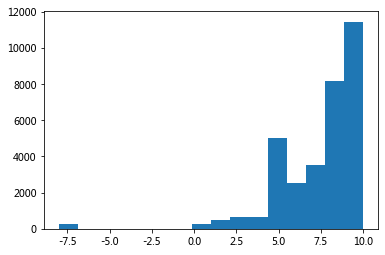

In [40]:
plt.hist(df['qm2016'], bins = 16);

## 缺失值

CFPS小课堂 | 请不要问我，我“不知道”，我“拒绝回答”......
- 问卷系统跳转造成的缺失，一般用“-8”（不适用）来表示
- 不同问卷类型合并造成的缺失，一般在数据库中是用“.”来表示的。
- 受访者原因造成的缺失，这种类型的缺失值在数据库中一般用“-2”（拒绝回答）和“-1”（不知道）来表示。


http://www.isss.pku.edu.cn/cfps/cjwt/cfpsxkt/1295293.htm

QA001B"年龄"

## 人口统计变量

In [17]:
df['age'].value_counts()

 50.0     847
 55.0     810
 48.0     778
 31.0     774
 29.0     766
         ... 
 98.0       4
 99.0       3
-8.0        2
 102.0      1
 100.0      1
Name: age, Length: 94, dtype: int64

In [50]:
df['retired'] = [1 if i ==1.0 else 0 for i in df['retire']]

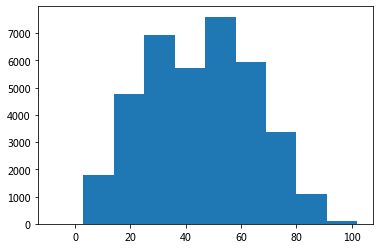

In [20]:
plt.hist(df['age']);

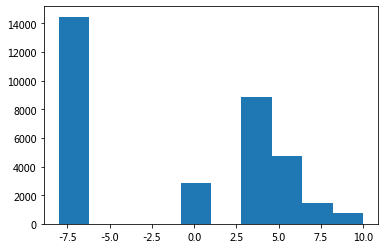

In [41]:
plt.hist(df['edu_updated']);

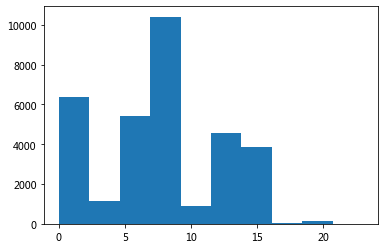

In [47]:
plt.hist(df['cfps2018eduy']);

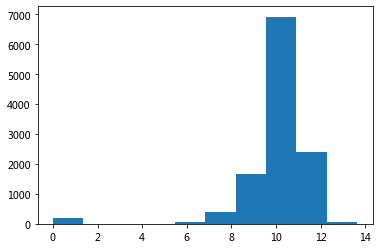

In [44]:
plt.hist(np.log(df['income']+1));

In [12]:
# 性别  1 男 5女
df['qa002'].value_counts()

5.0    16550
1.0    16547
Name: qa002, dtype: int64

In [85]:
df['male'] = [1 if i == 1.0 else 0 for i in df['qa002']]

In [22]:
# 性别  1 男 5女
df['edu_updated'].value_counts()

-8.0     14462
 4.0      5273
 3.0      3598
 5.0      3058
 0.0      2848
 6.0      1648
 7.0      1335
 10.0      756
 8.0       112
 9.0         7
Name: edu_updated, dtype: int64

In [24]:
df[df['edu_updated']==-8.0]['age'].min()

45.0

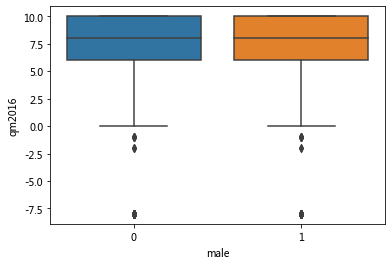

In [36]:
sns.boxplot(x="male", y="qm2016", data=df);

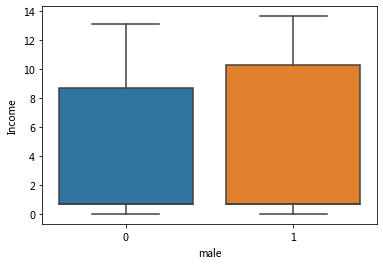

In [64]:
df['Income'] = np.log(df['income']+10)
sns.boxplot(x="male", y="Income",  data=df);

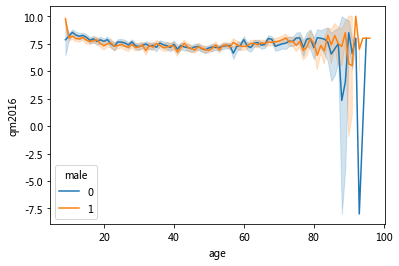

In [35]:
sns.lineplot(y = 'qm2016', x = 'age',  hue = 'male', data = df);

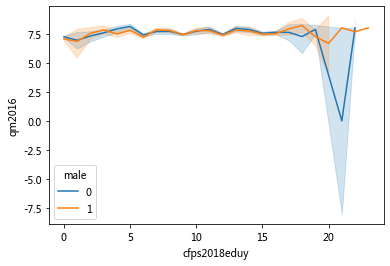

In [48]:
sns.lineplot(y = 'qm2016', x = 'cfps2018eduy',  hue = 'male', data = df);

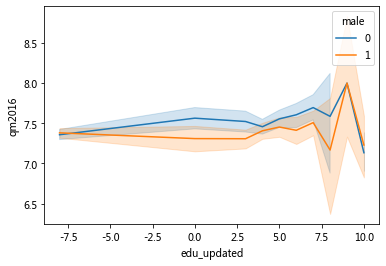

In [34]:
sns.lineplot(y = 'qm2016', x = 'edu_updated', hue = 'male', data = df);

In [66]:
df['qu7051'].value_counts()

-8.0        21502
 1000.0      1261
 2000.0      1176
 3000.0       895
 5000.0       801
            ...  
 1740.0         1
 26400.0        1
 41000.0        1
 92000.0        1
 680.0          1
Name: qu7051, Length: 265, dtype: int64

In [67]:
df['qu705'].value_counts()

-8.0    15603
 7.0     5899
 4.0     2980
 3.0     2616
 1.0     1681
 5.0     1531
 2.0     1416
 6.0     1367
-1.0        3
-2.0        1
Name: qu705, dtype: int64

In [68]:
df['qu702'].value_counts()

-8.0    21274
 7.0     5556
 1.0     4160
 2.0      723
 3.0      688
 4.0      338
 5.0      199
 6.0      156
-1.0        2
-2.0        1
Name: qu702, dtype: int64

In [96]:
# 锻炼身体的频率(次)"
df['qp701'].value_counts()

 0.0     16198
 7.0      8171
 3.0      2333
 2.0      2311
 5.0      1094
 1.0       975
 4.0       915
-8.0       386
 6.0       281
 14.0      195
 10.0       84
 21.0       29
-1.0        25
 8.0        21
 20.0       15
 15.0       14
 28.0        9
 12.0        8
 13.0        6
 35.0        5
 11.0        4
 9.0         4
 25.0        3
 50.0        3
-2.0         2
 22.0        2
 33.0        1
 30.0        1
 19.0        1
 26.0        1
Name: qp701, dtype: int64

In [94]:
df['qp702'].value_counts()

-8.0     16611
 7.0      2984
 2.0      1696
 3.0      1438
 14.0     1397
         ...  
 33.0        1
 66.5        1
 4.3         1
 3.6         1
 23.0        1
Name: qp702, Length: 117, dtype: int64

## 认知水平

In [101]:
# 'wordtest18', 'wordtest18_sc2'
df['wordtest18_sc2'].value_counts()

-8.0     7129
 0.0     3161
 22.0    1814
 21.0    1526
 28.0    1400
 31.0    1283
 26.0    1195
 30.0    1192
 24.0    1031
 25.0     997
 27.0     958
 19.0     907
 29.0     885
 23.0     846
 32.0     811
 12.0     634
 17.0     619
 18.0     580
 33.0     556
 20.0     497
 13.0     468
 16.0     447
 4.0      415
 11.0     410
 10.0     370
 6.0      348
 7.0      330
 34.0     329
 1.0      328
 5.0      316
 9.0      296
 15.0     264
 3.0      246
 14.0     206
 8.0      191
 2.0      112
Name: wordtest18_sc2, dtype: int64

In [102]:
# 'wordtest18', 'wordtest18_sc2'
df['mathtest18_sc2'].value_counts()

-8.0     7126
 9.0     3011
 8.0     2957
 0.0     2652
 7.0     2246
 10.0    2222
 4.0     1502
 15.0    1480
 5.0     1432
 6.0     1063
 11.0     937
 1.0      913
 3.0      881
 14.0     875
 17.0     630
 18.0     539
 16.0     450
 12.0     424
 23.0     362
 24.0     348
 2.0      318
 19.0     302
 13.0     245
 20.0      82
 22.0      71
 21.0      29
Name: mathtest18_sc2, dtype: int64

## CES-D量表 个人的抑郁水平

采用Center for Epidemiologic Studies Depression Scale (CES-D)量表来测试个人的抑郁水平。

'cesd20sc', 'cesd8'

- 我们建议用户如果只需要使用 CFPS2016 或者和 CFPS2018 年的数据时，采用 8 道题版本的总分，
- 但是如果用户需要同时使用 CFPS2012的数据进行分析时，采用 CESD20sc。

In [105]:
df['cesd8'].value_counts()

10.0    3535
12.0    3439
11.0    3359
13.0    3046
14.0    2993
15.0    2537
8.0     2517
9.0     2406
16.0    2136
17.0    1851
18.0    1446
19.0     859
20.0     649
21.0     488
22.0     382
23.0     278
24.0     197
26.0     132
25.0     128
27.0      75
28.0      45
29.0      32
31.0      25
30.0      24
32.0      19
Name: cesd8, dtype: int64

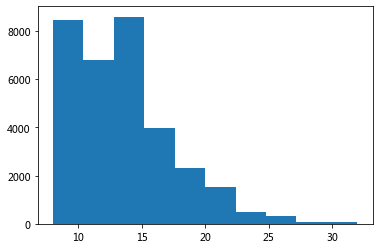

In [106]:
plt.hist(df['cesd8']);

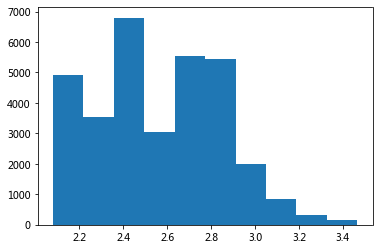

In [107]:
plt.hist(np.log(df['cesd8']));

## 大五人格

大五人格（ocean），也被称之为人格的海洋，可以通过neo-pi-r评定。
 
·外倾性（extraversion）：好交际对不好交际，爱娱乐对严肃，感情丰富对含蓄;表现出热情、社交、果断、活跃、冒险、乐观等特点。

·神经质或情绪稳定性（neuroticism）:烦恼对平静，不安全感对安全感，自怜对自我满意，包括焦虑、敌对、压抑、自我意识、冲动、脆弱等特质。

·开放性（openness）: 富于想象对务实，寻求变化对遵守惯例，自主对顺从。具有想象、审美、情感丰富、求异、创造、智慧等特征。

·随和性(agreeableness)：热心对无情，信赖对怀疑，乐于助人对不合作。包括信任、利他、直率、谦虚、移情等品质。

·尽责性(conscientiousness)：有序对无序，谨慎细心对粗心大意，自律对意志薄弱。包括胜任、公正、条理、尽职、成就、自律、谨慎、克制等特点。

In [115]:
['qm'+ str(i) for i in  range(201, 216)]

['qm201',
 'qm202',
 'qm203',
 'qm204',
 'qm205',
 'qm206',
 'qm207',
 'qm208',
 'qm209',
 'qm210',
 'qm211',
 'qm212',
 'qm213',
 'qm214',
 'qm215']

In [124]:
bigfive_o = ['qm'+ str(i) for i in  [204, 209, 214]]
bigfive_c = ['qm'+ str(i) for i in  [201, 207, 211]]
bigfive_e = ['qm'+ str(i) for i in  [202, 208, 212]]
bigfive_a = ['qm'+ str(i) for i in  [203, 206, 213]]
bigfive_n = ['qm'+ str(i) for i in  [205, 210, 215]]


df['bigfive_o'] = df[bigfive_o].sum(axis=1)/3
df['bigfive_c'] = df[bigfive_c].sum(axis=1)/3
df['bigfive_e'] = df[bigfive_e].sum(axis=1)/3
df['bigfive_a'] = df[bigfive_a].sum(axis=1)/3
df['bigfive_n'] = df[bigfive_n].sum(axis=1)/3

In [125]:
df['bigfive_o'].value_counts()

 3.333333    5237
 4.000000    4983
 0.000000    4276
 2.666667    4270
 3.000000    3353
 2.000000    2879
-8.000000    2843
 3.666667    2461
 2.333333    2049
 4.333333    1473
 1.666667     912
 4.666667     797
 5.000000     715
 1.333333     544
 1.000000     427
 0.666667      40
-1.000000      39
 0.333333      27
-0.333333      13
-4.666667       4
-0.666667       2
-3.666667       2
-2.000000       2
-4.333333       2
-1.333333       2
-1.666667       1
-4.000000       1
Name: bigfive_o, dtype: int64

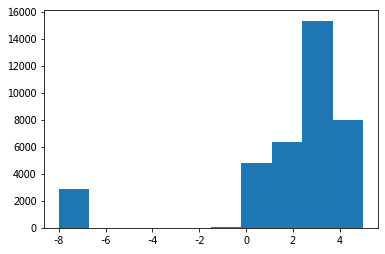

In [126]:
plt.hist(df['bigfive_o']);

In [113]:
df['qm201'].value_counts()

 4.0    18000
 5.0     8202
-8.0     2838
 3.0     2179
 2.0     1683
 1.0      183
-1.0       11
-2.0        1
Name: qm201, dtype: int64

## 描述性分析

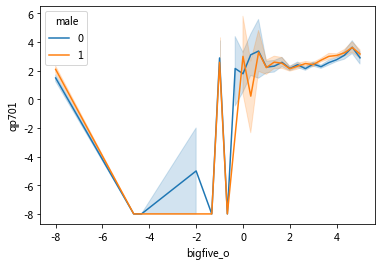

In [127]:
sns.lineplot(y = 'qp701', x = 'bigfive_o',  hue = 'male', data = df);

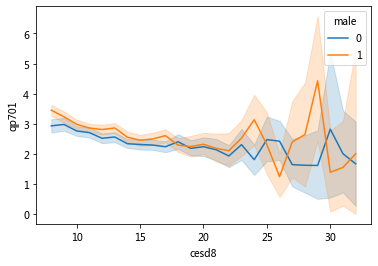

In [108]:
sns.lineplot(y = 'qp701', x = 'cesd8',  hue = 'male', data = df);

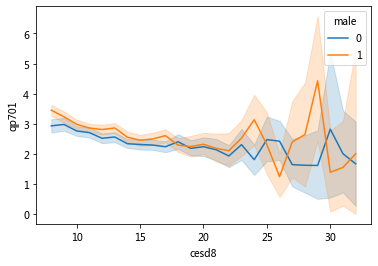

In [108]:
sns.lineplot(y = 'qp701', x = 'cesd8',  hue = 'male', data = df);

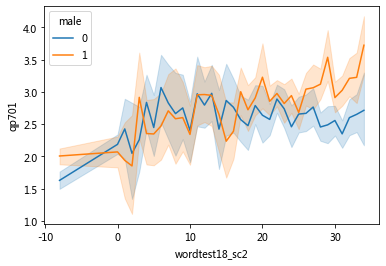

In [103]:
sns.lineplot(y = 'qp701', x = 'wordtest18_sc2',  hue = 'male', data = df);

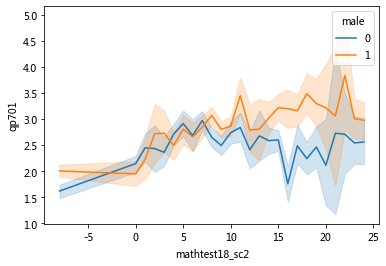

In [104]:
sns.lineplot(y = 'qp701', x = 'mathtest18_sc2',  hue = 'male', data = df);

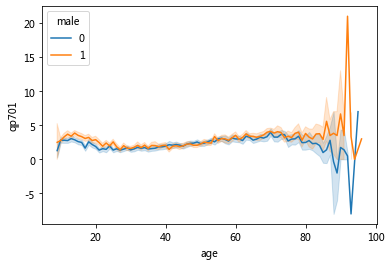

In [98]:
sns.lineplot(y = 'qp701', x = 'age',  hue = 'male', data = df);

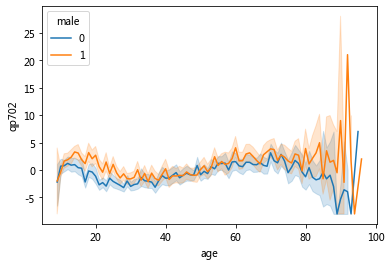

In [99]:
sns.lineplot(y = 'qp702', x = 'age',  hue = 'male', data = df);

In [69]:
# WV101"经济繁荣要拉大收入差距"为了经济繁荣就要拉大收入差距。
# 1. 十分不同意 2.不同意 3.同意 4.十分同意 5.既不同意也不反对【不读出】
df['wv101'].value_counts()


 3.0    14345
 2.0    13994
 1.0     1601
 5.0     1298
 4.0     1261
-8.0      312
-1.0      284
-2.0        2
Name: wv101, dtype: int64

## 价值观
- WV101"经济繁荣要拉大收入差距"为了经济繁荣就要拉大收入差距。
- WV102"公平竞争才有和谐人际"
- V103财富反映个人成就
- V104 "努力工作能有回报
- V105聪明才干能得回报
- V106 成大事难免腐败
- V107有关系比有能力重要
- V108  "提高生活水平机会很大



In [80]:
df['wv101'] = df['wv101'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])
df['wv102'] = df['wv102'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])
df['wv103'] = df['wv103'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])
df['wv104'] = df['wv104'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])
df['wv105'] = df['wv105'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])
df['wv106'] = df['wv106'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])
df['wv107'] = df['wv107'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])
df['wv108'] = df['wv108'].replace([3.0, 4.0, 5.0], [4.0, 5.0, 3.0])

In [81]:
# WV101"经济繁荣要拉大收入差距"为了经济繁荣就要拉大收入差距。
df['wv101'].value_counts()


 4.0    14345
 2.0    13994
 1.0     1601
 3.0     1298
 5.0     1261
-8.0      312
-1.0      284
-2.0        2
Name: wv101, dtype: int64

In [82]:
df['wv102'].value_counts()

 4.0    23152
 5.0     4605
 2.0     3616
 3.0      842
 1.0      366
-8.0      295
-1.0      219
-2.0        2
Name: wv102, dtype: int64

In [83]:
df['wv108'].value_counts()

 4.0    23264
 2.0     4759
 5.0     3296
 3.0     1084
-8.0      310
 1.0      306
-1.0       77
-2.0        1
Name: wv108, dtype: int64

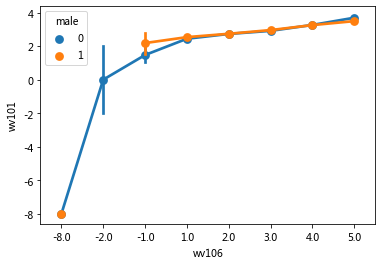

In [93]:
sns.pointplot(y = 'wv101', x = 'wv106',  hue = 'male', data = df[df['wv102'] >= 1]);

In [46]:
df['ear101a'].unique()

array([-8., nan, 11., 12., 13., 37., 61., 14., 51., 43., 21., 46., 65.,
       44., 15., 22., 23., 31., 45., 34., 32., 33., 52., 35., 36., 42.,
       41., 50., 53., 62., 54.])

In [49]:
df['qa401c_code'].unique()

array([       nan,  2.311e+03,  6.090e+02,  8.300e+02,  4.700e+01,
        9.989e+03,  5.600e+01,  5.100e+01,  1.437e+03,  2.960e+02,
        4.900e+01,  5.300e+01,  4.300e+02,  2.480e+02,  5.200e+01,
        5.000e+01,  4.600e+01,  4.800e+01,  8.297e+03,  6.900e+01,
        4.510e+02,  8.510e+02,  7.400e+01,  2.179e+03,  2.859e+03,
        2.853e+03,  7.200e+01,  1.780e+02,  1.530e+02,  1.600e+02,
        6.520e+02,  6.870e+02, -9.000e+00,  1.550e+02,  6.990e+02,
        7.900e+02,  1.977e+03,  1.480e+02,  6.100e+02,  6.980e+02,
        1.560e+02,  2.827e+03,  7.020e+02,  1.480e+03,  1.580e+02,
        2.388e+03,  6.490e+02,  1.652e+03,  1.276e+03,  1.570e+02,
        1.425e+03,  1.520e+02,  8.330e+02,  6.890e+02,  6.340e+02,
        3.780e+02,  7.370e+02,  1.510e+02,  6.270e+02,  2.999e+03,
        6.000e+01,  6.100e+01,  5.900e+01,  7.250e+02,  5.500e+01,
        5.400e+01,  1.520e+03,  7.580e+02,  1.534e+03,  7.861e+03,
        8.980e+02,  8.400e+02,  8.160e+02,  5.610e+02,  1.990e

In [41]:
df['ear101c_code'].unique()

array([      nan, 1.700e+02, 7.900e+01, 1.770e+02, 5.100e+01, 5.200e+01,
       1.930e+02, 1.990e+02, 4.800e+01, 5.000e+01, 1.564e+03, 4.600e+01,
       2.010e+02, 2.610e+02, 1.445e+03, 2.772e+03, 4.140e+02, 8.297e+03,
       8.415e+03, 6.900e+01, 3.840e+02, 7.100e+01, 7.400e+01, 7.200e+01,
       1.840e+02, 3.740e+02, 7.500e+01, 7.300e+01, 2.288e+03, 1.854e+03,
       1.530e+02, 1.600e+02, 6.080e+02, 6.090e+02, 6.550e+02, 1.470e+02,
       1.485e+03, 6.560e+02, 1.550e+02, 6.520e+02, 1.480e+02, 6.100e+02,
       1.610e+02, 6.610e+02, 1.560e+02, 1.920e+02, 3.066e+03, 1.690e+02,
       1.270e+02, 1.500e+02, 6.750e+02, 6.800e+02, 6.260e+02, 1.520e+02,
       6.350e+02, 6.730e+02, 1.620e+02, 6.840e+02, 1.570e+02, 6.690e+02,
       5.390e+02, 1.540e+02, 6.190e+02, 1.590e+02, 6.720e+02, 1.510e+02,
       2.558e+03, 7.370e+02, 6.100e+01, 7.710e+02, 6.000e+01, 6.715e+03,
       5.900e+01, 5.500e+01, 5.550e+02, 8.300e+02, 5.800e+01, 5.400e+01,
       9.010e+02, 8.150e+02, 8.170e+02, 9.200e+01, 

In [42]:
df['ear101a'].value_counts()

-8.0     31876
 44.0      165
 62.0      144
 31.0      111
 51.0       93
 41.0       90
 21.0       65
 32.0       57
 14.0       56
 13.0       47
 37.0       46
 23.0       42
 36.0       40
 35.0       33
 61.0       27
 53.0       27
 43.0       25
 33.0       24
 52.0       23
 45.0       20
 22.0       17
 42.0       17
 65.0       11
 34.0       11
 12.0       10
 50.0        8
 11.0        7
 46.0        2
 15.0        2
 54.0        1
Name: ear101a, dtype: int64

In [55]:
pd.DataFrame(df['qa401c_code'].value_counts())

,qa401c_code
113.0,11
21.0,9
123.0,8
144.0,7
124.0,7
...,...
1053.0,1
8316.0,1
2363.0,1
1729.0,1
